Read Dataset

In [63]:
import pandas as pd
raw_data = pd.read_csv("digikala_samsung_comments.csv")
raw_data 

,product_id,comment_id,author_name,rating,date,comment_text
0,16736269,79542197,سجاد کریمی,4,11 آبان 1404,دوماهه خریدم تا حالا که خیلی خوب بوده
1,16736269,79535362,محمدحسین جلالی علی آبادی,5,11 آبان 1404,عالیییی
2,16736269,79529471,کاربر دیجی‌کالا,5,11 آبان 1404,همه چیزش عالی.\nسری S fe سامسونگ هم قیمتش خوبه...
3,16736269,79529355,محسن اسمعیلی منفرد,5,11 آبان 1404,قبلاً اس بیست و سه داشتم راضی بودم این ورژن جد...
4,16736269,79527891,کاربر دیجی‌کالا,5,10 آبان 1404,من از خود دیجی کالا خریدم سالم بود فعلا و به ر...
...,...,...,...,...,...,...
6501,18577783,72861012,مهدی رسولی,0,30 اسفند 1403,با این قیمت مفت هم نمی ارزه
6502,18577783,72860095,مصطفی امیریان,0,30 اسفند 1403,قیمتا دارن کجا میرن نمیدونم تا کجا میرن قبلا و...
6503,18577783,72855190,کاربر دیجی‌کالا,0,30 اسفند 1403,زیر 20 تومن ارزش خرید داره. امیدوارم دلار پایی...
6504,18577783,72851318,کاربر دیجی‌کالا,3,29 اسفند 1403,ارزش خرید نداره با این قیمت برید A55 بخرید از ...


Preprocessing

In [64]:
df = pd.DataFrame(raw_data)
df.drop(["product_id", "comment_id", "author_name", "date"], axis=1, inplace=True)

Clean comments

apply Normalizer

In [65]:
from shekar import Normalizer

normalizer = Normalizer()

df["normalized_text"] = df["comment_text"].apply(normalizer)
df


,rating,comment_text,normalized_text
0,4,دوماهه خریدم تا حالا که خیلی خوب بوده,دوماهه خریدم تا حالا که خیلی خوب بوده
1,5,عالیییی,عالیی
2,5,همه چیزش عالی.\nسری S fe سامسونگ هم قیمتش خوبه...,همه چیزش عالی.\n سری S fe سامسونگ هم قیمتش خوب...
3,5,قبلاً اس بیست و سه داشتم راضی بودم این ورژن جد...,قبلا اس بیست و سه داشتم راضی بودم این ورژن جدی...
4,5,من از خود دیجی کالا خریدم سالم بود فعلا و به ر...,من از خود دیجی کالا خریدم سالم بود فعلا و به ر...
...,...,...,...
6501,0,با این قیمت مفت هم نمی ارزه,با این قیمت مفت هم نمی ارزه
6502,0,قیمتا دارن کجا میرن نمیدونم تا کجا میرن قبلا و...,قیمتا دارن کجا میرن نمیدونم تا کجا میرن قبلا و...
6503,0,زیر 20 تومن ارزش خرید داره. امیدوارم دلار پایی...,زیر ۲۰ تومن ارزش خرید داره. امیدوارم دلار پایی...
6504,3,ارزش خرید نداره با این قیمت برید A55 بخرید از ...,ارزش خرید نداره با این قیمت برید A۵۵ بخرید از ...


Remove non-linguistic noises

In [66]:
import re

def clean_noise(text):
    text = re.sub(r"http\S+", "", text) 
    text = re.sub(r"@[A-Za-z0-9_]+", "", text)  
    text = re.sub(r"#\S+", "", text) 
    text = re.sub(r"[^\w\sآ-ی]", " ", text)
    text = re.sub(r"\s+", " ", text).strip()  
    return text

df["cleaned_text"] = df["normalized_text"].apply(clean_noise)
# df.drop(columns=["comment_text" , "normalized_text"] , axis=1)



tokenizer

In [67]:
import pandas as pd
from shekar import WordTokenizer

tokenizer = WordTokenizer()

df['cleaned_tokenized_text'] = df['cleaned_text'].apply(
    lambda text: list(tokenizer(text)) if isinstance(text, str) else []
)

df


,rating,comment_text,normalized_text,cleaned_text,cleaned_tokenized_text
0,4,دوماهه خریدم تا حالا که خیلی خوب بوده,دوماهه خریدم تا حالا که خیلی خوب بوده,دوماهه خریدم تا حالا که خیلی خوب بوده,"[دوماهه, خریدم, تا, حالا, که, خیلی, خوب, بوده]"
1,5,عالیییی,عالیی,عالیی,[عالیی]
2,5,همه چیزش عالی.\nسری S fe سامسونگ هم قیمتش خوبه...,همه چیزش عالی.\n سری S fe سامسونگ هم قیمتش خوب...,همه چیزش عالی سری S fe سامسونگ هم قیمتش خوبه ه...,"[همه, چیزش, عالی, سری, S, fe, سامسونگ, هم, قیم..."
3,5,قبلاً اس بیست و سه داشتم راضی بودم این ورژن جد...,قبلا اس بیست و سه داشتم راضی بودم این ورژن جدی...,قبلا اس بیست و سه داشتم راضی بودم این ورژن جدی...,"[قبلا, اس, بیست, و, سه, داشتم, راضی, بودم, این..."
4,5,من از خود دیجی کالا خریدم سالم بود فعلا و به ر...,من از خود دیجی کالا خریدم سالم بود فعلا و به ر...,من از خود دیجی کالا خریدم سالم بود فعلا و به ر...,"[من, از, خود, دیجی, کالا, خریدم, سالم, بود, فع..."
...,...,...,...,...,...
6501,0,با این قیمت مفت هم نمی ارزه,با این قیمت مفت هم نمی ارزه,با این قیمت مفت هم نمی ارزه,"[با, این, قیمت, مفت, هم, نمی, ارزه]"
6502,0,قیمتا دارن کجا میرن نمیدونم تا کجا میرن قبلا و...,قیمتا دارن کجا میرن نمیدونم تا کجا میرن قبلا و...,قیمتا دارن کجا میرن نمیدونم تا کجا میرن قبلا و...,"[قیمتا, دارن, کجا, میرن, نمیدونم, تا, کجا, میر..."
6503,0,زیر 20 تومن ارزش خرید داره. امیدوارم دلار پایی...,زیر ۲۰ تومن ارزش خرید داره. امیدوارم دلار پایی...,زیر ۲۰ تومن ارزش خرید داره امیدوارم دلار پایین...,"[زیر, ۲۰, تومن, ارزش, خرید, داره, امیدوارم, دل..."
6504,3,ارزش خرید نداره با این قیمت برید A55 بخرید از ...,ارزش خرید نداره با این قیمت برید A۵۵ بخرید از ...,ارزش خرید نداره با این قیمت برید A۵۵ بخرید از ...,"[ارزش, خرید, نداره, با, این, قیمت, برید, A۵۵, ..."


Make ready 

In [68]:
df.drop(["comment_text" , "normalized_text"] , axis=1 , inplace=True)
df

,rating,cleaned_text,cleaned_tokenized_text
0,4,دوماهه خریدم تا حالا که خیلی خوب بوده,"[دوماهه, خریدم, تا, حالا, که, خیلی, خوب, بوده]"
1,5,عالیی,[عالیی]
2,5,همه چیزش عالی سری S fe سامسونگ هم قیمتش خوبه ه...,"[همه, چیزش, عالی, سری, S, fe, سامسونگ, هم, قیم..."
3,5,قبلا اس بیست و سه داشتم راضی بودم این ورژن جدی...,"[قبلا, اس, بیست, و, سه, داشتم, راضی, بودم, این..."
4,5,من از خود دیجی کالا خریدم سالم بود فعلا و به ر...,"[من, از, خود, دیجی, کالا, خریدم, سالم, بود, فع..."
...,...,...,...
6501,0,با این قیمت مفت هم نمی ارزه,"[با, این, قیمت, مفت, هم, نمی, ارزه]"
6502,0,قیمتا دارن کجا میرن نمیدونم تا کجا میرن قبلا و...,"[قیمتا, دارن, کجا, میرن, نمیدونم, تا, کجا, میر..."
6503,0,زیر ۲۰ تومن ارزش خرید داره امیدوارم دلار پایین...,"[زیر, ۲۰, تومن, ارزش, خرید, داره, امیدوارم, دل..."
6504,3,ارزش خرید نداره با این قیمت برید A۵۵ بخرید از ...,"[ارزش, خرید, نداره, با, این, قیمت, برید, A۵۵, ..."


SentimentClassify for dataset labels

In [69]:
from shekar import SentimentClassifier
import pandas as pd
import numpy as np


sentiment_classifier = SentimentClassifier()

def is_valid_input(text):
    return isinstance(text, str) and len(text.strip()) > 0

def get_combined_sentiment(row, max_chunk_length=500):
    text = row["cleaned_text"]
    user_rating = row["rating"]

    if not is_valid_input(text):
        return 0, "neutral"

    try:
        chunks = [text[i:i + max_chunk_length] for i in range(0, len(text), max_chunk_length)]
        
        model_scores = []
        for chunk in chunks:
            if is_valid_input(chunk):
                sentiment, score = sentiment_classifier(chunk)
                sentiment_score = score if sentiment == 'positive' else -score
                model_scores.append(sentiment_score)

        model_final_score = np.mean(model_scores) if model_scores else 0
        
        normalized_user_rating = (user_rating - 2.5) / 2.5

        final_combined_score = (model_final_score + normalized_user_rating) / 2.0
        
        final_label = "positive" if final_combined_score > 0 else "negative"
        
        return final_combined_score, final_label

    except Exception as e:
        print(f"Error processing text snippet: '{text[:80]}...'")
        print(f"Error: {e}")
        return None, "error"

df[["final_sentiment_score", "sentiment_label"]] = df.apply(
    lambda row: pd.Series(get_combined_sentiment(row)), axis=1
)


print("\n--- Rows with Errors ---")
error_df = df[df['sentiment_label'] == 'error']

if error_df.empty:
    print("No processing errors occurred.")
else:
    print(error_df)
    
df.drop("cleaned_text" , axis=1 , inplace=True)


--- Rows with Errors ---
No processing errors occurred.


Report : 
در اینجا میخواستیم شدت احساسات و نوع احساس را بگوییم 
در اینجا از کتابخانه شکر استفاده کردیم و روی ستونی که دیتای تمیز و توکن شده را در آن قرار داده بودیم از تابع تشخیص احساسات استفاده کردیم
حال ما یک دیتای اضافه به نام امتیاز ثبت شده توسط کاربر هم داشتیم که بین صفر تا پنج بود و آن را بین منفی یک تا یک بردیم
و با خروجی تابع تحلیل احساسات میانگین گرفتیم تا تشخیص بهتری داشته باشیم
همچنین چون برای استفاده از تابع تحلیل احساسات محدودیت طول داشتیم آن را تیکه تیکه میکنیم و وقتی مدل را برای همه اجرا کردیم در نهایت میانگین میگیریم و به کل متن نسبت میدهیم

Show Dataframe

In [70]:
df

,rating,cleaned_tokenized_text,final_sentiment_score,sentiment_label
0,4,"[دوماهه, خریدم, تا, حالا, که, خیلی, خوب, بوده]",0.747477,positive
1,5,[عالیی],0.997805,positive
2,5,"[همه, چیزش, عالی, سری, S, fe, سامسونگ, هم, قیم...",0.997630,positive
3,5,"[قبلا, اس, بیست, و, سه, داشتم, راضی, بودم, این...",0.062486,positive
4,5,"[من, از, خود, دیجی, کالا, خریدم, سالم, بود, فع...",0.968062,positive
...,...,...,...,...
6501,0,"[با, این, قیمت, مفت, هم, نمی, ارزه]",-0.935190,negative
6502,0,"[قیمتا, دارن, کجا, میرن, نمیدونم, تا, کجا, میر...",-0.925674,negative
6503,0,"[زیر, ۲۰, تومن, ارزش, خرید, داره, امیدوارم, دل...",-0.200374,negative
6504,3,"[ارزش, خرید, نداره, با, این, قیمت, برید, A۵۵, ...",-0.181501,negative


Now that we have a clean dataset with labels, let's make it ready for the model

Vectorized

In [71]:
from gensim.models import Word2Vec
import pandas as pd


model_vec = Word2Vec(sentences=df["cleaned_tokenized_text"], vector_size=100, window=5, min_count=1, workers=4)
model_vec.save("word2vec_model")

def sentence_to_vec(tokens, model_vec):
    vectors = [model_vec.wv[word] for word in tokens if word in model_vec.wv]
    return sum(vectors) / len(vectors) if vectors else None

df["sentence_vec"] = df["cleaned_tokenized_text"].apply(lambda x: sentence_to_vec(x, model_vec))

df


,rating,cleaned_tokenized_text,final_sentiment_score,sentiment_label,sentence_vec
0,4,"[دوماهه, خریدم, تا, حالا, که, خیلی, خوب, بوده]",0.747477,positive,"[-0.21271077, 0.33555147, 0.06746381, -0.19139..."
1,5,[عالیی],0.997805,positive,"[-0.043221, 0.09307559, 0.03209884, -0.0377354..."
2,5,"[همه, چیزش, عالی, سری, S, fe, سامسونگ, هم, قیم...",0.997630,positive,"[-0.13743125, 0.45864764, 0.14286959, 0.020663..."
3,5,"[قبلا, اس, بیست, و, سه, داشتم, راضی, بودم, این...",0.062486,positive,"[-0.2588357, 0.23116837, -0.0073651173, -0.347..."
4,5,"[من, از, خود, دیجی, کالا, خریدم, سالم, بود, فع...",0.968062,positive,"[-0.69715255, 0.3880443, -0.3919331, -0.718196..."
...,...,...,...,...,...
6501,0,"[با, این, قیمت, مفت, هم, نمی, ارزه]",-0.935190,negative,"[-0.11541271, 0.49881473, 0.23370254, -0.15898..."
6502,0,"[قیمتا, دارن, کجا, میرن, نمیدونم, تا, کجا, میر...",-0.925674,negative,"[-0.0029352496, 0.19894858, 0.16796099, -0.171..."
6503,0,"[زیر, ۲۰, تومن, ارزش, خرید, داره, امیدوارم, دل...",-0.200374,negative,"[-0.078639016, 0.37020585, 0.20070256, -0.1133..."
6504,3,"[ارزش, خرید, نداره, با, این, قیمت, برید, A۵۵, ...",-0.181501,negative,"[-0.05513217, 0.4312935, 0.20426103, -0.030723..."


In [72]:
numeric_df = pd.DataFrame({
    "sentence_vec_mean": df["sentence_vec"],
    "final_sentiment_score": df["final_sentiment_score"],
    "sentiment_label": df["sentiment_label"]
})
numeric_df = numeric_df[numeric_df['sentence_vec_mean'].notna()]

numeric_df


,sentence_vec_mean,final_sentiment_score,sentiment_label
0,"[-0.21271077, 0.33555147, 0.06746381, -0.19139...",0.747477,positive
1,"[-0.043221, 0.09307559, 0.03209884, -0.0377354...",0.997805,positive
2,"[-0.13743125, 0.45864764, 0.14286959, 0.020663...",0.997630,positive
3,"[-0.2588357, 0.23116837, -0.0073651173, -0.347...",0.062486,positive
4,"[-0.69715255, 0.3880443, -0.3919331, -0.718196...",0.968062,positive
...,...,...,...
6501,"[-0.11541271, 0.49881473, 0.23370254, -0.15898...",-0.935190,negative
6502,"[-0.0029352496, 0.19894858, 0.16796099, -0.171...",-0.925674,negative
6503,"[-0.078639016, 0.37020585, 0.20070256, -0.1133...",-0.200374,negative
6504,"[-0.05513217, 0.4312935, 0.20426103, -0.030723...",-0.181501,negative


دو سطر داشتیم که آرایه عددی کلمات نبود داخل اونا و حذفشون کردم

In [73]:
import numpy as np


X = np.vstack(numeric_df['sentence_vec_mean'].values)
y = numeric_df['final_sentiment_score'].values

print("X shape:", X.shape)
print("y shape:", y.shape)



X shape: (6504, 100)
y shape: (6504,)


Apply model

In [74]:
from sklearn.linear_model import BayesianRidge
from sklearn.model_selection import train_test_split
import numpy as np

X = np.vstack(numeric_df['sentence_vec_mean'])
y = numeric_df['final_sentiment_score'].values
y_label = np.where(numeric_df['sentiment_label'] == 'positive', 1, 0)


X_train, X_test, y_train, y_test, y_label_train, y_label_test = train_test_split(X, y, y_label, test_size=0.2, random_state=42)
model = BayesianRidge()
model.fit(X_train, y_train)
y_pred = model.predict(X_test)



Perfomance test

In [75]:
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, confusion_matrix
import numpy as np


threshold = 0.35
y_pred_label = np.where(y_pred > threshold, 1, 0)

print("Accuracy:", accuracy_score(y_label_test, y_pred_label))
print("Precision:", precision_score(y_label_test, y_pred_label))
print("Recall:", recall_score(y_label_test, y_pred_label))
print("F1-score:", f1_score(y_label_test, y_pred_label))

Accuracy: 0.8293620292083013
Precision: 0.8874172185430463
Recall: 0.9010566762728146
F1-score: 0.894184938036225


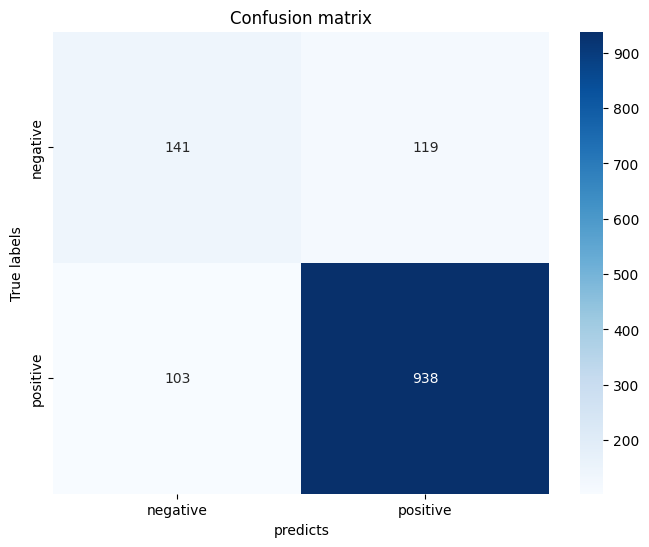

In [76]:
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.metrics import confusion_matrix
import numpy as np

cm = confusion_matrix(y_label_test, y_pred_label)

plt.figure(figsize=(8, 6))
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues', xticklabels=["negative", "positive"], yticklabels=["negative", "positive"])
plt.xlabel('predicts')
plt.ylabel('True labels')
plt.title('Confusion matrix')
plt.show()


A function for sentiment Analyzes of a new comment

In [77]:
import numpy as np

def sentence_to_vec(tokens, model_vec):
    vectors = [model_vec.wv[word] for word in tokens if word in model_vec.wv]
    return sum(vectors) / len(vectors) if vectors else np.zeros(model_vec.vector_size) 

def predict_sentiment(new_text, model_vec, bayes_model, threshold=0.0):

    tokens = tokenizer(new_text)

    vec = sentence_to_vec(tokens, model_vec).reshape(1, -1)

    score = bayes_model.predict(vec)[0]

    sentiment = "positive" if score >= threshold else "negative"
    
    return sentiment, score


Test new input

In [78]:
new_input = "ارزش خرید داره"
sentiment_new_input , score_new_input = predict_sentiment(new_input , model_vec , model , threshold=0.35 ) 
print(sentiment_new_input)
new_input = "مفت نمیارزه"
sentiment_new_input , score_new_input = predict_sentiment(new_input , model_vec , model , threshold=0.35 ) 
print(sentiment_new_input)

positive
negative
